<a href="https://colab.research.google.com/github/pramodkumhal/ML-Practice/blob/main/Medical_Insurance_cost_Prediction/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [85]:
df = pd.read_csv("/content/insurance.csv")

In [86]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
df.shape

(1338, 7)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [89]:
#Checking for Missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Data Analysis

In [90]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


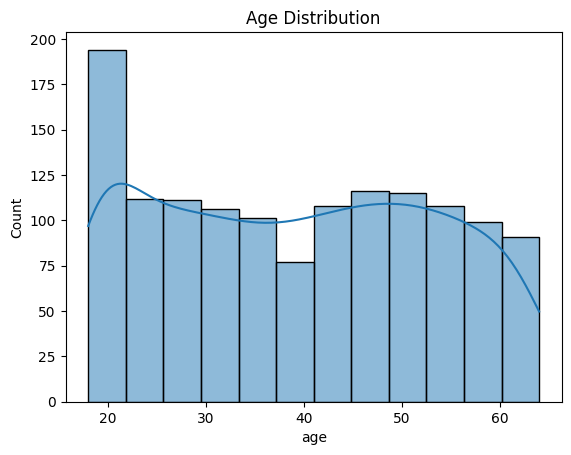

In [91]:
sns.histplot(data=df,x='age',kde=True)
plt.title("Age Distribution")
plt.show()

<ipython-input-92-bcbfbcf759fd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='sex',palette='pastel')


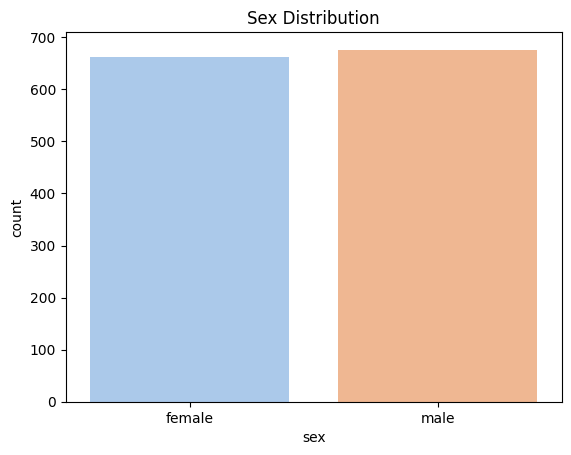

In [92]:
sns.countplot(data=df,x='sex',palette='pastel')
plt.title('Sex Distribution')
plt.show()

In [93]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


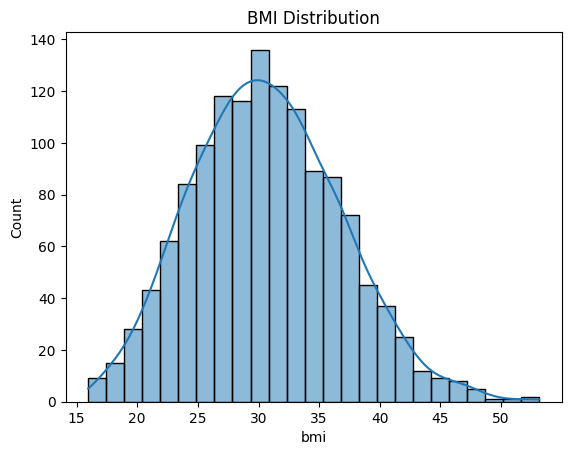

In [94]:
  sns.histplot(data=df,x='bmi',kde=True)
  plt.title("BMI Distribution")
  plt.show()

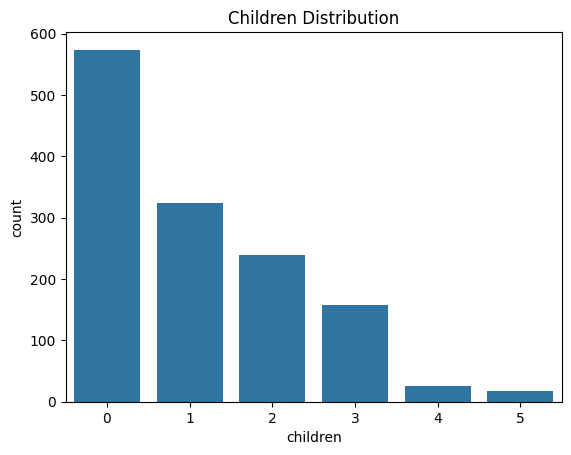

In [95]:
sns.countplot(data=df,x='children')
plt.title("Children Distribution")
plt.show()

In [96]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


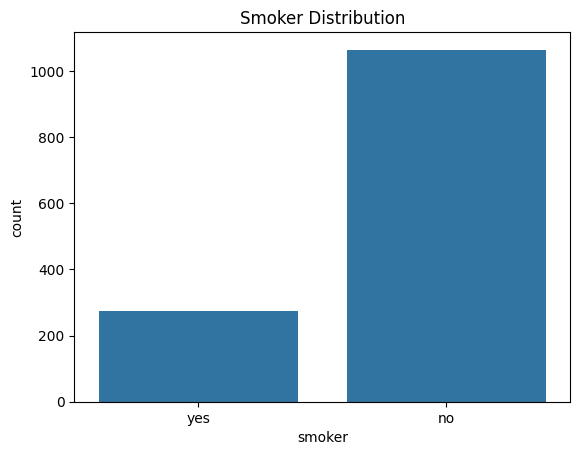

In [97]:
sns.countplot(data=df,x='smoker')
plt.title('Smoker Distribution')
plt.show()

In [98]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


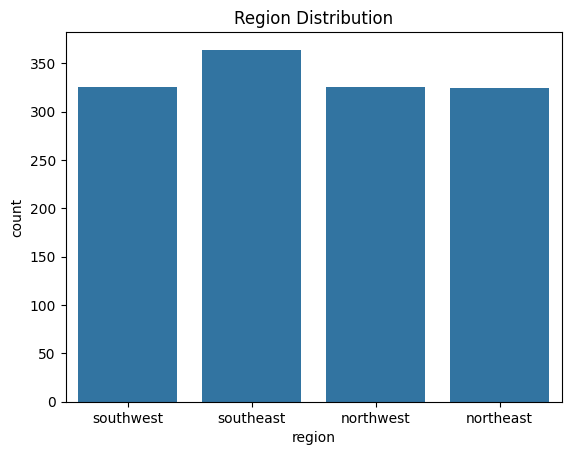

In [99]:
sns.countplot(data=df,x='region')
plt.title('Region Distribution')
plt.show()

In [100]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


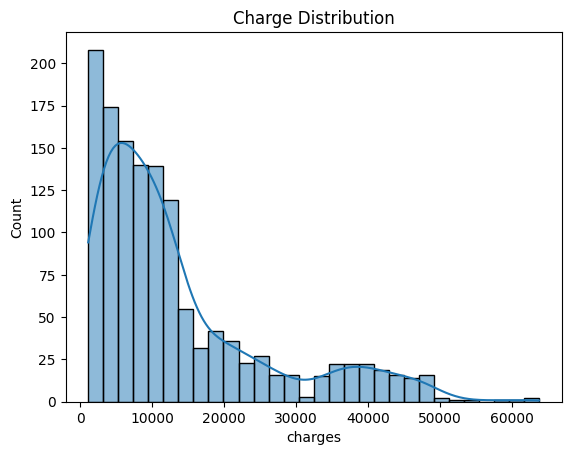

In [101]:
sns.histplot(data=df,x='charges',kde=True)
plt.title("Charge Distribution")
plt.show()

# Data Preprocessing

## Encoding Categorical data

In [102]:
#Encoding the sex column
df.replace({'sex':{'male':0,'female':1 }},inplace=True)

#Encoding the smoker column
df.replace({'smoker':{'no':0,'yes':1 }},inplace=True)

#Encoding the region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3 }},inplace=True)

<ipython-input-102-e9a4b6487cac>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1 }},inplace=True)
<ipython-input-102-e9a4b6487cac>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'no':0,'yes':1 }},inplace=True)
<ipython-input-102-e9a4b6487cac>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.

In [103]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [104]:
X = df.drop(columns='charges',axis=1)
Y = df['charges']

In [105]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [106]:
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [107]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [108]:
X_train

,age,sex,bmi,children,smoker,region
882,21,1,22.135,0,0,2
505,37,0,30.875,3,0,3
798,58,1,33.100,0,0,1
792,22,1,23.180,0,0,2
201,48,1,32.230,1,0,0
...,...,...,...,...,...,...
466,60,1,28.700,1,0,1
299,48,1,28.880,1,0,3
493,61,0,43.400,0,0,1
527,51,1,25.800,1,0,1


# Model Training

In [109]:
lr = LinearRegression()

In [110]:
lr.fit(X_train, Y_train)

LinearRegression()

In [111]:
train_data_predictiion = lr.predict(X_train)

In [112]:
r2_train = metrics.r2_score(Y_train, train_data_predictiion )

In [113]:
print("R Squared value : ",r2_score)

R Squared value :  0.751505643411174


In [114]:
test_data_predictiion = lr.predict(X_test)

In [115]:
r2_test = metrics.r2_score(Y_test, test_data_predictiion )
print("R Squared value : ",r2_score)

R Squared value :  0.751505643411174


# Building the Predictive Sytem

In [125]:
input_data = (31,1,25.74,0,0,0)

#Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)

print('The insurance cost in USD :', prediction[0])

The insurance cost in USD : 3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
